---

Tom Curran

Problem Set \#8

March 12, 2018

---

In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn import metrics 
from sklearn.metrics import classification_report, mean_squared_error
from pylab import rcParams



from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

df = pd.read_csv("https://raw.githubusercontent.com/UC-MACSS/persp-model_W18/master/ProblemSets/PS8/data/strongdrink.txt")

df.columns

/Users/thomascurran/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Index(['cultivar', 'alco', 'malic', 'ash', 'alk', 'magn', 'tot_phen', 'flav',
       'nonfl_phen', 'proanth', 'color_int', 'hue', 'OD280rat', 'proline'],
      dtype='object')

1. **Neural network horse race (10 points).** For this problem, you will test the predictive accuracy of three models on classifying wines into one of three possible cultivars.The data in the file strongdrink.txt. The data are comprised of 176 observations, each of which is a chemical analysis of an Italian wine. Each wine is from one of three known cultivars (a cultivar is a group of grapes selected for desirable characteristics that can be maintained by propagation). The chemical analysis determined the quantities of the following 13 different constituents (the last 13 variables):

---

a) Create a scatterplot of the data where the x-variable is alcohol (alco) and the y-variable is color intensity (color int). Make the dot of each of the three possible cultivar types a different color. Make sure your plot has a legend


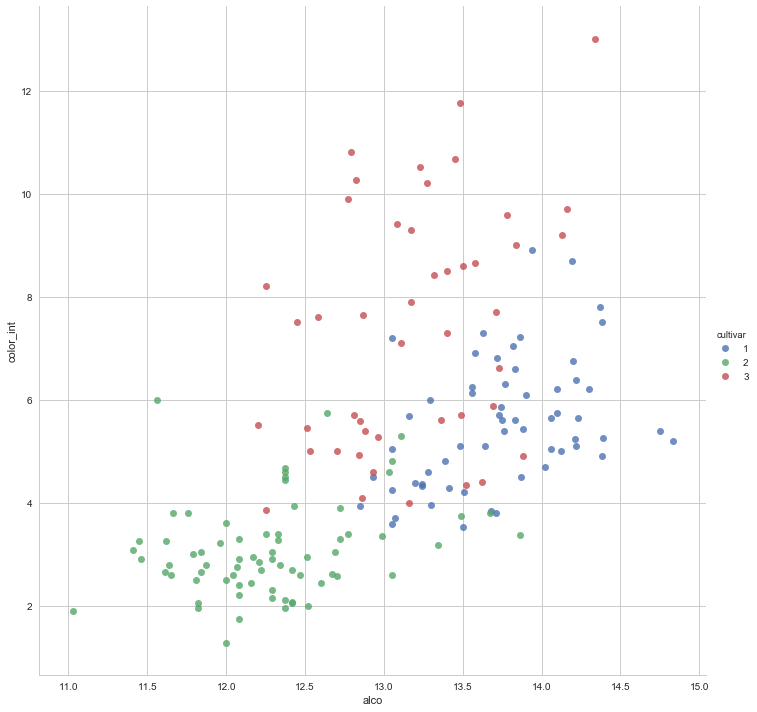

In [2]:

sb.lmplot(x = 'alco', 
          y = 'color_int', 
          data = df, 
          hue = 'cultivar',
         fit_reg = False, 
         size = 10)

---
b) Use sklearn.linear model.LogisticRegression to fit a multinomial logistic model of cultivar on features alcohol (alco), malic acid (malic), total phenols (tot phen), and color intensity (color int) with the following linear predictor.

In [3]:
y = df['cultivar']

x = df[['alco','malic', 'tot_phen', 'color_int']]

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .3, random_state = 25)

In [4]:
k = 4

xvals = np.array(x)

yvals = np.array(y)

kf = KFold(n_splits = k, shuffle = True, random_state =22)

kf.get_n_splits(xvals)

mse = np.zeros(k)

C = np.zeros(100)

mse_c = np.zeros(100)


In [5]:
k_index = int(0)

for i in range(100):
    
    c = (i+1)/100

    k_index = int(0)

    for train_index, test_index in kf.split(xvals):    
        x_train_k, x_test_k = xvals[train_index], xvals[test_index]
        y_train_k, y_test_k = yvals[train_index], yvals[test_index]

        multilogreg_k = LogisticRegression(multi_class='multinomial', 
                                           fit_intercept = True,
                                           solver='newton-cg', 
                                           C = c)

        multilogreg_k.fit(x_train_k, y_train_k)

        yhat_k = multilogreg_k.predict(x_test_k)
        
        err = y_test_k != yhat_k
        
        mse[k_index] =err.mean()
        
        k_index += 1
    C[i] = c
    mse_c[i] = mse.mean()
    
mse_logit = pd.DataFrame({"C": C, "MSE":mse_c}).sort_values(['MSE']).head(25)

mse_logit

,C,MSE
36,0.37,0.068182
29,0.30,0.068182
30,0.31,0.068182
31,0.32,0.068182
32,0.33,0.068182
33,0.34,0.068182
34,0.35,0.068182
35,0.36,0.068182
37,0.38,0.068182
38,0.39,0.068182


The lowest MSE occurs when C is between .44 and .28, where it equals .068182. This has the 'I2' penalty.

---
c) Use sklearn.ensemble.RandomForestClassifier to fit a random for- est model of cultivar on the same four features used in part (b). set bootstrap=True, set oob score=True, and set random state=22. Use OOB cross-validation to generate the MSE of your random forest classifier. Play with the values of the tuning parameters n estimators, max depth, and min samples leaf to try and find the lowest possible MSE from the OOB cross validation. Report your minimized overall MSE along with the tuning parameter values you used for n estimators, max depth, and min samples leaf.

In [76]:
loop = pd.DataFrame({'n': np.zeros(5),
                   "min_sample_leaf": np.zeros(5), 
                   'max_depth':np.zeros(5), 
                   "mse": np.zeros(5)})
rf = loop[:0]


for i in range(15):
    print(i)
    for j in range(15):
        for k in range(5):
            rf_mod = RandomForestClassifier(n_estimators = (k * 50 + 50),
                                            min_samples_leaf = (i * 5 + 5),
                                            max_depth = (j + 1), 
                                            bootstrap = True,
                                            oob_score = True,
                                            random_state = 22)
            rf_mod.fit(x,y)
            
            loop.n[k] = k * 50 + 50
            loop.min_sample_leaf[k] = i * 5 + 5
            loop.max_depth[k] = j + 1
            loop.mse[k] = 1 - rf_mod.oob_score_
            
        rf = pd.concat([rf, loop])
    
print("---------------")
rf.index = range(len(rf))
rf.sort_values(['mse']).head(10)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
---------------


,max_depth,min_sample_leaf,mse,n
96,5.0,10.0,0.068182,100.0
126,11.0,10.0,0.068182,100.0
116,9.0,10.0,0.068182,100.0
131,12.0,10.0,0.068182,100.0
111,8.0,10.0,0.068182,100.0
106,7.0,10.0,0.068182,100.0
121,10.0,10.0,0.068182,100.0
101,6.0,10.0,0.068182,100.0
136,13.0,10.0,0.068182,100.0
86,3.0,10.0,0.068182,100.0


The lowest MSE is the same as the logistic regression method uses in part b, where MSE = .068182, when the Random Forest Classifier has a max_depth of 5, n is 100, and minimum number of leaves is 10.

---

d) Use sklearn.svm.SVC to fit a support vector machines model of cultivar with a Gaussian radial basis function kernel kernel=’rbf’ on the four fea- tures used in parts (b) and (c). Fit the model using k-fold cross validation with k = 4 folds exactly as in part (b).

 clf_svm = KFold(n_splits=4, shuffle=True, random_state=22)
 
Play with the penalty parameter C and the coefficient on the radial basis function gamma to try and find the lowest possible MSE from the k-fold cross validation. Report your minimized overall MSE along with the tuning parameter values you used for C and gamma.

In [30]:
from sklearn import svm

k = 4

clf_mlp = KFold(n_splits=k, random_state=22, shuffle=True)

clf_mlp.get_n_splits(x)

mse = np.zeros(k)

mse_c = pd.DataFrame({"c" : np.zeros(80),
                      "g" : np.zeros(80),
                      "mse" : np.zeros(80)})
mse_svm = mse_c[:0]

for g in range(80):
    for c in range(80):
        k_ind = int(0)
        for train_index, test_index in clf_mlp.split(xvals):
            xtrain, xtest = xvals[train_index], xvals[test_index]
            ytrain, ytest = yvals[train_index], yvals[test_index]
            svc = svm.SVC(kernel='rbf', gamma = (g/20 + 0.05),
                          C=c/20 + 0.05)
            svc.fit(xtrain, ytrain)
            yhat = svc.predict(xtest)
            error = ytest != yhat
            mse[k_ind] = error.mean()
            k_ind += 1
        mse_c['c'][c] = c/20 + 0.05
        mse_c['g'][c] = g/20 + 0.05
        mse_c['mse'][c] =  mse.mean()
    mse_svm = pd.concat([mse_svm, mse_c])
mse_svm.index = range(len(mse_svm))
mse_svm.sort_values(['mse']).head(10)

,c,g,mse
2659,1.00,1.70,0.045455
2578,0.95,1.65,0.045455
2658,0.95,1.70,0.045455
224,3.25,0.15,0.051136
225,3.30,0.15,0.051136
226,3.35,0.15,0.051136
227,3.40,0.15,0.051136
228,3.45,0.15,0.051136
229,3.50,0.15,0.051136
218,2.95,0.15,0.051136


When cost is 1, gamma is 1.7 the mse for the SVM model has a value of .045

---

e) Use sklearn.neural network.MLPClassifier to fit a single hidden layer neural network model of cultivar. Fit the model using k-fold cross vali- dation with k = 4 folds exactly as in parts (b) and (d).


clf_mlp = KFold(n_splits=4, shuffle=True, random_state=22)

Play with the tuning parameters of the hidden layer sizes hidden layer sizes, activation function activation, and the regularization penalty alpha to try and find the lowest possible MSE from the k-fold cross validation. Re- port your minimized overall MSE along with the tuning parameter values you used for hidden layer sizes, activation, and alpha.

In [94]:
k = 4

clf_mlp = KFold(n_splits=k, random_state=22, shuffle=True)

clf_mlp.get_n_splits(x)

mse_mlp_array = np.zeros(k)

activation_layers = np.array(['identity', 'logistic', 'tanh', 'relu'])

mse_mlp = pd.DataFrame({"activation" : np.zeros(20),
                        "hidden_layer" : np.zeros(20),
                        "alpha" : np.zeros(20),
                        "mse":np.zeros(20)})

mse_mlp_df = mse_mlp[:0]

for al in activation_layers:
    activation_layer = al
    print(activation_layer)
    
    for hl in range(0,8):
        
        hidden_layer_size = ((50 * (hl + 1)))
        
        print(hidden_layer_size)
        
        for alpha in range(20):
            
            a = ((alpha/20)+.05)

            k_index = 0


            for train_index, test_index in clf_mlp.split(xvals):    
                    xtrain, xtest = xvals[train_index], xvals[test_index]
                    ytrain, ytest = yvals[train_index], yvals[test_index]

                    mlp = MLPClassifier(activation=activation_layer,
                                        solver='lbfgs',
                                        alpha = a, 
                                        hidden_layer_sizes = hidden_layer_size,
                                        random_state = 25)

                    mlp.fit(xtrain, ytrain)

                    yhat = mlp.predict(xtest)
                    
                    error = ytest != yhat

                    mse_mlp_array[k_index] = error.mean()

                    k_index += 1
                    
            mse_mlp['activation'][alpha] = activation_layer
            mse_mlp['hidden_layer'][alpha] = hidden_layer_size
            mse_mlp['alpha'][alpha]= a
            mse_mlp['mse'][alpha] = mse_mlp_array.mean()
        mse_mlp_df= pd.concat([mse_mlp_df, mse_mlp])

        
mse_mlp_df.index = range(len(mse_mlp_df))
mse_mlp_df.sort_values(['mse']).head(10)

identity
50


/Users/thomascurran/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thomascurran/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thomascurran/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thomascurran/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A

100
150
200
250
300
350
400
logistic
50
100
150
200
250
300
350
400
tanh
50
100
150
200
250
300
350
400
relu
50
100
150
200
250
300
350
400


,activation,alpha,hidden_layer,mse
601,relu,0.10,350.0,0.039773
532,relu,0.65,150.0,0.039773
603,relu,0.20,350.0,0.039773
553,relu,0.70,200.0,0.039773
527,relu,0.40,150.0,0.039773
584,relu,0.25,300.0,0.039773
609,relu,0.50,350.0,0.039773
613,relu,0.70,350.0,0.039773
562,relu,0.15,250.0,0.039773
616,relu,0.85,350.0,0.045455


The lowest mse found was .039773, whcih had an alpha value of .1, 350 hidden layers and used the relu activation.

---
(f) Which of the above three models do you think is the best predictor of cultivar? Why?


In [95]:
mlp = np.array(mse_mlp_df.mse.sort_values().head(10))
svm = np.array(mse_svm.mse.sort_values().head(10))
rf_df = np.array(rf.mse.sort_values().head(10))
logit = np.array(mse_logit.MSE.sort_values().head(10))

mod_eval = pd.DataFrame({"mlp": mlp, "svm":svm, "random forest":rf_df, "logit": logit})
mod_eval['Ranking'] = np.array([1,2,3,4,5,6,7,8,9,10])
mod_eval

,logit,mlp,random forest,svm,Ranking
0,0.068182,0.039773,0.068182,0.045455,1
1,0.068182,0.039773,0.068182,0.045455,2
2,0.068182,0.039773,0.068182,0.045455,3
3,0.068182,0.039773,0.068182,0.051136,4
4,0.068182,0.039773,0.068182,0.051136,5
5,0.068182,0.039773,0.068182,0.051136,6
6,0.068182,0.039773,0.068182,0.051136,7
7,0.068182,0.039773,0.068182,0.051136,8
8,0.068182,0.039773,0.068182,0.051136,9
9,0.068182,0.045455,0.068182,0.051136,10


Text(0.5,0,'Rank')

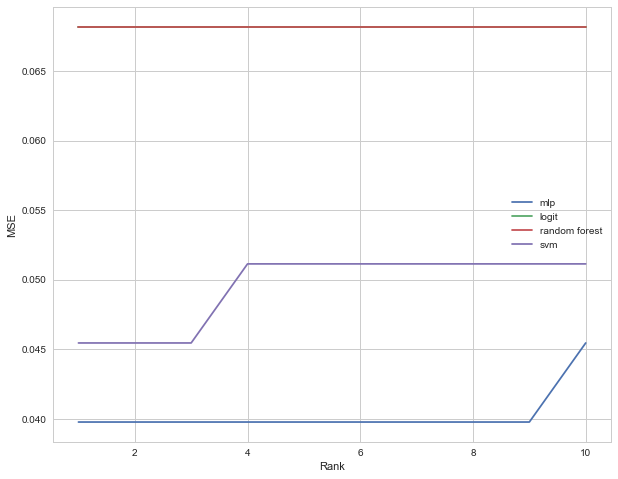

In [96]:
plt.plot(mod_eval.Ranking, mod_eval['mlp'], label = 'mlp')
plt.plot(mod_eval.Ranking, mod_eval['logit'], label = 'logit')
plt.plot(mod_eval.Ranking, mod_eval['random forest'], label = 'random forest')
plt.plot(mod_eval.Ranking, mod_eval['svm'], label = 'svm')
plt.legend(loc = "best"),
plt.ylabel("MSE")
plt.xlabel("Rank")

Based on the output from the models, I would choose the neural network as the best predictor of cultivar since it has the consistently lowest MSE. My second choice would be to use svm models. I would choose neural networks because.